<a href="https://colab.research.google.com/github/sumukh03/SIH/blob/main/Multi_step_ahead.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import date
import yfinance as yf
from plotly import graph_objs as go
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
class Stock:
    def __init__(self,ticker):
        self.ticker=ticker
        self.scaler=MinMaxScaler(feature_range=(0,1))
        self.moving_average=20
        self.step_ahead=10
        # self.predictions_file = np.array()
        self.START="2015-01-01"
        # self.END=date.today().strftime("%Y-%m-%d") #setting the end date as today
        self.END = "2023-12-31"
        print(self.END)

    def get_data(self):
        """this function takes the start and end date and loads the stock data available from the yahoo finance """
        yf.pdr_override()
        data=pdr.get_data_yahoo(self.ticker, self.START,self.END)
        data.reset_index(inplace=True)
        self.data=data
        self.train_length=int(len(self.data)*0.9)
        print("train_length",self.train_length)

    def test_train_splitting(self):
        self.train=pd.DataFrame(self.data["Close"][0:self.train_length])
        self.test=pd.DataFrame(self.data["Close"][self.train_length:])
        self.x_train,self.y_train=self.calc_moving_average(self.train)
        self.x_test,self.y_test=self.calc_moving_average(self.test)
        print(self.x_train.shape,self.y_train.shape,self.x_test.shape,self.y_test.shape,)


    def calc_moving_average(self,data):
        """scales the data and gives the moving average of 50 days"""
        # data_array=self.scaler.fit_transform(data)
        data_array=data['Close'].tolist()
        x=[]
        y=[]
        for i in range(self.moving_average,len(data_array)-self.step_ahead):
            x.append(data_array[i-self.moving_average:i])
            y.append(data_array[i:i+self.step_ahead])
        # x,y=np.array(x,dtype=object),np.array(y,dtype=object)
        x = np.asarray(x).astype(np.float32)
        y = np.asarray(y).astype(np.float32)
        return x,y


    def build_fit_model(self):

        # Build the LSTM model
        self.model = Sequential()
        self.model.add(LSTM(128, return_sequences=True, input_shape= (self.x_train.shape[1], 1)))
        self.model.add(LSTM(64, return_sequences=False))
        self.model.add(Dense(25))
        self.model.add(Dense(self.step_ahead))

        # Compile the model
        self.model.compile(optimizer='adam', loss='mean_squared_error')
        self.model.fit(self.x_train, self.y_train, batch_size=1, epochs=5)

    def test_model(self):
        self.predictions = self.model.predict(self.x_test)
        # self.predictions = self.scaler.inverse_transform(predictions)

    def get_root_mean_square_error(self):
        rmse = np.sqrt(np.mean(((self.predictions - self.y_test) ** 2)))
        return rmse

    def start(self):
        self.get_data()
        self.test_train_splitting()
        self.build_fit_model()
        self.test_model()

    def prediction(self,data):
        data=[self.data.tail(self.moving_average).tolist()]
        self.model.predict(data)

    def get_prediction(self,number_of_days):
        data=self.x_train[-1]
        # data=data['Close'].tolist()
        # predictions=[]
        # np.asarray(x).astype(np.float32)
        prediction = self.model.predict(data)
        # for _ in range(number_of_days):
        #   predictions.append(prediction.flatten())
        #   data = np.concatenate((data[:, 1:, :], prediction.reshape((1, 10, 1))), axis=1)
        return prediction

In [3]:
goog=Stock("GOOG")
goog.start()

2023-12-31


[*********************100%%**********************]  1 of 1 completed


train_length 2037
(2007, 20) (2007, 10) (197, 20) (197, 10)
Epoch 1/5
2007/2007 [==============================] - 46s 20ms/step - loss: 489.6701
Epoch 2/5
  92/2007 [>.............................] - ETA: 31s - loss: 18.9766

KeyboardInterrupt: 

In [ ]:
preds = goog.model.predict(goog.x_test[-2].reshape((1,goog.moving_average)))

1/1 [==============================] - 0s 20ms/step


In [ ]:
preds.shape

(1, 10)

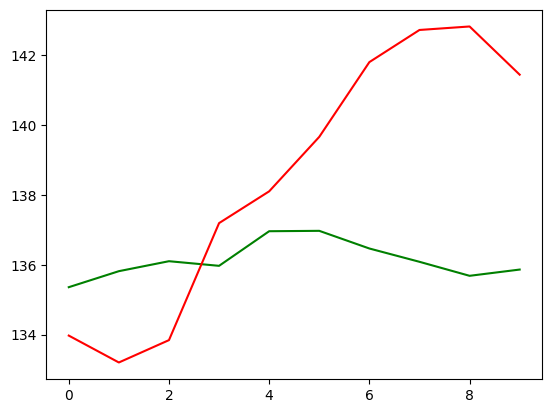

In [ ]:
plt.plot(preds[0],"g")
plt.plot(goog.y_test[-2],"r")

In [ ]:
# Define the ticker symbol
tickerSymbol = 'GOOGL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2024-01-01', end='2024-02-01')

# See only closing values
closing_values = tickerDf['Close']

print(closing_values)


Date
2024-01-02 00:00:00-05:00    138.169998
2024-01-03 00:00:00-05:00    138.919998
2024-01-04 00:00:00-05:00    136.389999
2024-01-05 00:00:00-05:00    135.729996
2024-01-08 00:00:00-05:00    138.839996
2024-01-09 00:00:00-05:00    140.949997
2024-01-10 00:00:00-05:00    142.279999
2024-01-11 00:00:00-05:00    142.080002
2024-01-12 00:00:00-05:00    142.649994
2024-01-16 00:00:00-05:00    142.490005
2024-01-17 00:00:00-05:00    141.470001
2024-01-18 00:00:00-05:00    143.479996
2024-01-19 00:00:00-05:00    146.380005
2024-01-22 00:00:00-05:00    145.990005
2024-01-23 00:00:00-05:00    147.039993
2024-01-24 00:00:00-05:00    148.699997
2024-01-25 00:00:00-05:00    151.869995
2024-01-26 00:00:00-05:00    152.190002
2024-01-29 00:00:00-05:00    153.509995
2024-01-30 00:00:00-05:00    151.460007
2024-01-31 00:00:00-05:00    140.100006
Name: Close, dtype: float64


In [ ]:
np.array(closing_values)

array([138.16999817, 138.91999817, 136.38999939, 135.72999573,
       138.83999634, 140.94999695, 142.27999878, 142.08000183,
       142.6499939 , 142.49000549, 141.47000122, 143.47999573,
       146.38000488, 145.99000549, 147.03999329, 148.69999695,
       151.86999512, 152.19000244, 153.50999451, 151.46000671,
       140.1000061 ])

In [ ]:
goog.test_model()

5/5 [==============================] - 1s 5ms/step


In [ ]:
print(goog.x_train.shape,goog.y_train.shape,goog.x_test.shape,goog.y_test.shape,)

(1987, 50) (1987, 30) (150, 50) (150, 30)


In [ ]:
goog.x_test

array([[105.84, 104.22, 106.26, ..., 125.43, 124.64, 123.37],
       [104.22, 106.26, 106.06, ..., 124.64, 123.37, 124.37],
       [106.26, 106.06, 103.06, ..., 123.37, 124.37, 125.23],
       ...,
       [138.98, 136.74, 137.9 , ..., 141.44, 141.28, 140.93],
       [136.74, 137.9 , 140.12, ..., 141.28, 140.93, 139.56],
       [137.9 , 140.12, 126.67, ..., 140.93, 139.56, 140.36]],
      dtype=float32)

In [ ]:
goog.model.predict(np.array(goog.x_test[-1].reshape(1,30)))

1/1 [==============================] - 0s 18ms/step


array([[135.59868, 135.67177, 135.3365 , 136.71843, 135.6991 , 135.11078,
        134.68532, 134.83997, 134.77303, 135.18355, 136.015  , 134.59174,
        135.125  , 134.54149, 135.47934, 135.2902 , 135.37851, 136.24069,
        136.15688, 136.6681 ]], dtype=float32)

In [ ]:
type(goog.x_test[0])

numpy.ndarray

In [ ]:
np.array(goog.y_test[-1].reshape(1,30))

array([[136.38, 138.7 , 136.94, 137.92, 138.62, 140.02, 138.22, 138.05,
        138.62, 136.4 , 133.92, 133.32, 130.63, 132.39, 131.43, 138.45,
        136.64, 134.7 , 133.64, 133.97, 133.2 , 133.84, 137.19, 138.1 ,
        139.66, 141.8 , 142.72, 142.82, 141.44, 141.28]], dtype=float32)

1/1 [==============================] - 0s 18ms/step


[]

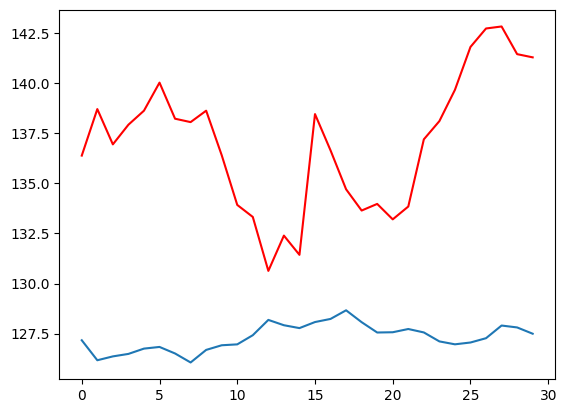

In [ ]:
plt.plot(range(len(goog.x_test[0])),np.array(goog.y_test[-1].reshape(1,30))[0],'r')
plt.plot(range(len(goog.x_test[0])),goog.model.predict(np.array(goog.x_test[-2].reshape(1,30)))[0])
plt.plot()

In [ ]:
from re import VERBOSE
yf.pdr_override()
data=pdr.get_data_yahoo('GOOG', "2024-02-10","2024-02-19")

[*********************100%%**********************]  1 of 1 completed


In [4]:
import json

# Define student_details dictionary
student_details ={
	"name" : "sathiyajith",
	"rollno" : 56,
	"cgpa" : 8.6,
	"phonenumber" : "9976770500"
}

# Convert and write JSON object to file
with open("sample.json", "w") as outfile:
	json.dump(student_details, outfile)
